# iris資料集介紹

In [3]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10) 

In [4]:
from sklearn import datasets
iris = datasets.load_iris() #載入iris資料集

In [5]:
iris.keys() #列出有哪些欄位

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
print(iris['DESCR']) #查看官方的說明

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
print(iris['feature_names']) #花有哪些特徵資料，下表可以得知有四種

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
import pandas as pd
x = pd.DataFrame(iris['data'] ,columns=iris['feature_names']) #將所有花的特徵資料（長度等等）列表出來
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
y = pd.DataFrame(iris['target'], columns=['target_names']) #花的種類（Lable）
y

,target_names
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [10]:
data = pd.concat([x,y], axis=1) #所有花的資料（含種類、特徵等等）
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# 資料預處理

In [11]:
X = iris.data #所有未經處理的特徵資料
Y = iris.target #所有未經處理Lable

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder #X與Y要一起隨機切成訓練與測試兩部分，使用sklearn.model_selection  模組當中的train_test_split。
enc = OneHotEncoder() 

In [13]:
X_train,X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=0) #切割其中的20%作為測試資料

In [14]:
y_Train_OneHot = np_utils.to_categorical(y_train)
y_Test_OneHot = np_utils.to_categorical(y_test) #one-hot code轉換

# 建立模型

In [15]:
from keras.models import Sequential
from keras.layers import Dense

In [16]:
model = Sequential()

In [17]:
#將「輸入層」與「隱藏層」加入模型

In [18]:
model.add(Dense(units=1000, 
                input_dim=4, 
                kernel_initializer='normal', 
                activation='relu'))

In [19]:
#將「輸出層」加入模型

In [20]:
model.add(Dense(units=3, 
                kernel_initializer='normal', 
                activation='softmax'))

In [21]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              5000      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 3003      
Total params: 8,003
Trainable params: 8,003
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
#Param 參數 #代表個數
#第一層權重個數 大W 1000*4+1000(偏移值B)= 5000
#第二層權重個數 W(2) 1000*3+3=3003

# 訓練模型

In [23]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [24]:
train_history=model.fit(x=X_train, #fit = match適配
                        y=y_Train_OneHot,validation_split=0.2, #validation 驗證資料：60000切成0.2份=12000（一邊訓練一邊驗證成果）
                        epochs=10, batch_size=10,verbose=2) #epochs=10 訓練週期 batch_size=10 小批次學習10筆（從剩下的120筆資料隨機抓10筆，一共抓10次）
                        #得阻止訓練過度

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 96 samples, validate on 24 samples
Epoch 1/10
 - 2s - loss: 0.9126 - acc: 0.6979 - val_loss: 0.8493 - val_acc: 0.5417
Epoch 2/10
 - 0s - loss: 0.6713 - acc: 0.7292 - val_loss: 0.6889 - val_acc: 0.5417
Epoch 3/10
 - 0s - loss: 0.5466 - acc: 0.7292 - val_loss: 0.5899 - val_acc: 0.7083
Epoch 4/10
 - 0s - loss: 0.4607 - acc: 0.8333 - val_loss: 0.5556 - val_acc: 0.5833
Epoch 5/10
 - 0s - loss: 0.4218 - acc: 0.7812 - val_loss: 0.4933 - val_acc: 0.7083
Epoch 6/10
 - 0s - loss: 0.3945 - acc: 0.7708 - val_loss: 0.4402 - val_acc: 0.8750
Epoch 7/10
 - 0s - loss: 0.3593 - acc: 0.9687 - val_loss: 0.4352 - val_acc: 0.8333
Epoch 8/10
 - 0s - loss: 0.3429 - acc: 0.8229 - val_loss: 0.3911 - val_acc: 0.8750
Epoch 9/10
 - 0s - loss: 0.3153 - acc: 0.9375 - val_loss: 0.3566 - val_acc: 0.8750
Epoch 10/10
 - 0s - loss: 0.2972 - acc: 0.9479 - val_loss: 0.3469 - val_acc: 0.8750


In [25]:
#- 2s - loss: 0.9126 - acc: 0.6979 - val_loss: 0.8493 - val_acc: 0.5417
#120筆的 loss 錯誤率 acc 正確率 前面結果在做驗證資料：val_loss 錯誤大小 val_acc 正確率

# 以圖形顯示訓練過程的loss & accuracy

In [26]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

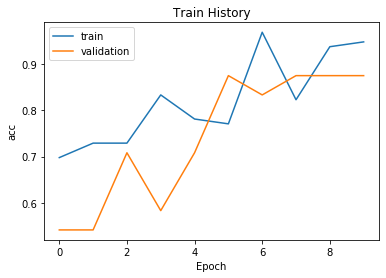

In [27]:
show_train_history(train_history,'acc','val_acc') #要做validation(驗證正確率)是因為要避免訓練過度

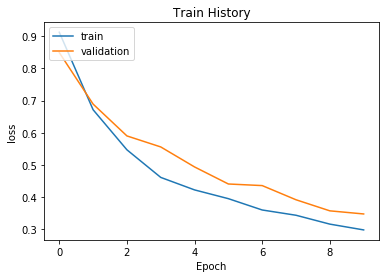

In [28]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [29]:
scores = model.evaluate(X_test, y_Test_OneHot)
print()
print('accuracy=',scores[1])

30/30 [==============================] - 0s 225us/step

accuracy= 0.9666666388511658


In [ ]:
prediction=model.predict_classes(X_test) 

In [ ]:
prediction